<a href="https://colab.research.google.com/github/ekanshtrivedi/machine-learning/blob/master/ML_J066_EXP_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_covtype, fetch_kddcup99, fetch_lfw_pairs, fetch_lfw_people, fetch_olivetti_faces
from sklearn.datasets import fetch_rcv1, load_breast_cancer, load_digits, load_wine

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

In [3]:
from keras import models
from keras import layers
from keras.utils import to_categorical

COVTYPE

In [4]:
forest = fetch_covtype()
x = forest.data
y = forest.target

In [5]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)
print(x.shape)
print(y.shape)

(581012, 54)
(581012, 1)


In [6]:
y1 = y.replace([1,2,3,4,5,6,7], [0,1,2,3,4,5,6])
y1 = to_categorical(y1)
x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size = 0.2)
x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size = 0.5)
print(x_train.shape)
print(x_dev.shape)
print(x_test.shape)
print(y_train.shape)
print(y_dev.shape)
print(y_test.shape)

(464809, 54)
(58101, 54)
(58102, 54)
(464809, 7)
(58101, 7)
(58102, 7)


In [7]:
nn = models.Sequential()
nn.add(layers.Dense(1024, activation = 'relu', input_shape = (54, )))
nn.add(layers.Dense(512, activation = 'relu'))
nn.add(layers.Dense(256, activation = 'relu'))
nn.add(layers.Dense(128, activation = 'relu'))
nn.add(layers.Dense(54, activation = 'relu'))
nn.add(layers.Dense(7, activation = 'softmax'))
nn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [8]:
history = nn.fit(x_train, y_train, epochs = 100, batch_size = 5000, validation_data = (x_dev, y_dev))

Epoch 1/100
93/93 [==============================] - 1s 13ms/step - loss: 21.8546 - accuracy: 0.4106 - val_loss: 2.6446 - val_accuracy: 0.3894
Epoch 2/100
93/93 [==============================] - 1s 9ms/step - loss: 2.9562 - accuracy: 0.4577 - val_loss: 0.9610 - val_accuracy: 0.5900
Epoch 3/100
93/93 [==============================] - 1s 10ms/step - loss: 0.8982 - accuracy: 0.6224 - val_loss: 0.8697 - val_accuracy: 0.6321
Epoch 4/100
93/93 [==============================] - 1s 9ms/step - loss: 0.8964 - accuracy: 0.6077 - val_loss: 0.8887 - val_accuracy: 0.5831
Epoch 5/100
93/93 [==============================] - 1s 10ms/step - loss: 0.7775 - accuracy: 0.6734 - val_loss: 0.7383 - val_accuracy: 0.6945
Epoch 6/100
93/93 [==============================] - 1s 10ms/step - loss: 1.2190 - accuracy: 0.6185 - val_loss: 1.1413 - val_accuracy: 0.6531
Epoch 7/100
93/93 [==============================] - 1s 10ms/step - loss: 0.8041 - accuracy: 0.6770 - val_loss: 0.7069 - val_accuracy: 0.7147
Epoch 8

In [9]:
dev_acc = nn.evaluate(x_dev, y_dev)[1]
print('The dev accuracy is',dev_acc)

1816/1816 [==============================] - 4s 2ms/step - loss: 0.2918 - accuracy: 0.8805
The dev accuracy is 0.8804667592048645


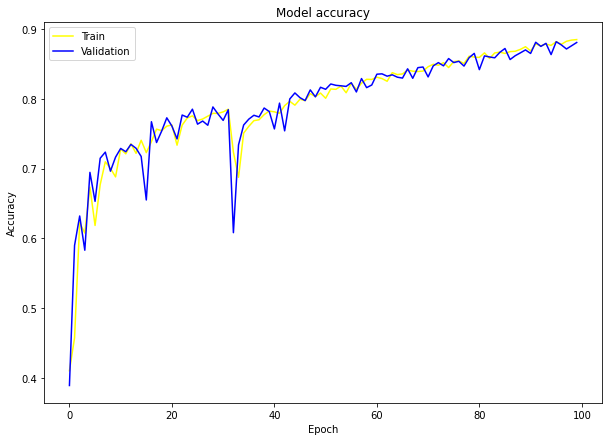

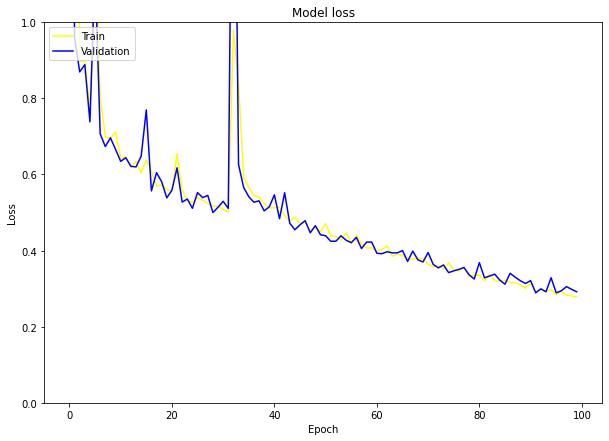

In [10]:
plt.figure(figsize = (10,7))
plt.plot(history.history['accuracy'], color = 'yellow')
plt.plot(history.history['val_accuracy'], color = 'blue')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(history.history['loss'], color = 'yellow')
plt.plot(history.history['val_loss'], color = 'blue')
plt.ylim((0,1))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

KDDCUP99

In [11]:
kddcup99 = fetch_kddcup99()
x = kddcup99.data
y_fetch = kddcup99.target

In [12]:
x = pd.DataFrame(x)
y = pd.DataFrame(y_fetch)
print(x.shape)
print(y.shape)

(494021, 41)
(494021, 1)


In [13]:
le = LabelEncoder()
for i in [1,2,3]:
  x[i] = [j.decode('utf-8') for j in x[i]]
  x[i] = le.fit_transform(x[i])

for i in range(x.shape[1]):
  x[i] = x[i].astype('float')

In [14]:
y = [i.decode('utf-8') for i in y_fetch]
y = pd.DataFrame(le.fit_transform(y))

In [15]:
y = to_categorical(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size = 0.5)
print(x_train.shape)
print(x_dev.shape)
print(x_test.shape)
print(y_train.shape)
print(y_dev.shape)
print(y_test.shape)

(395216, 41)
(49402, 41)
(49403, 41)
(395216, 23)
(49402, 23)
(49403, 23)


In [16]:
nn = models.Sequential()
nn.add(layers.Dense(1024, activation = 'relu', input_shape = (41, )))
nn.add(layers.Dense(512, activation = 'relu'))
nn.add(layers.Dense(256, activation = 'relu'))
nn.add(layers.Dense(128, activation = 'relu'))
nn.add(layers.Dense(54, activation = 'relu'))
nn.add(layers.Dense(23, activation = 'softmax'))
nn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
history = nn.fit(x_train, y_train, epochs = 20, batch_size = 1500, validation_data = (x_dev, y_dev))

Epoch 1/20
264/264 [==============================] - 2s 6ms/step - loss: 75.7636 - accuracy: 0.9304 - val_loss: 2.3004 - val_accuracy: 0.9465
Epoch 2/20
264/264 [==============================] - 1s 4ms/step - loss: 42.0573 - accuracy: 0.9614 - val_loss: 1.4265 - val_accuracy: 0.9877
Epoch 3/20
264/264 [==============================] - 1s 4ms/step - loss: 14.2699 - accuracy: 0.9760 - val_loss: 0.0725 - val_accuracy: 0.9866
Epoch 4/20
264/264 [==============================] - 1s 5ms/step - loss: 0.2356 - accuracy: 0.9877 - val_loss: 0.0570 - val_accuracy: 0.9913
Epoch 5/20
264/264 [==============================] - 1s 4ms/step - loss: 0.0968 - accuracy: 0.9898 - val_loss: 0.0472 - val_accuracy: 0.9915
Epoch 6/20
264/264 [==============================] - 1s 4ms/step - loss: 0.1052 - accuracy: 0.9904 - val_loss: 0.0546 - val_accuracy: 0.9914
Epoch 7/20
264/264 [==============================] - 1s 4ms/step - loss: 0.0729 - accuracy: 0.9900 - val_loss: 0.6573 - val_accuracy: 0.9904
Epo

In [18]:
dev_acc = nn.evaluate(x_dev, y_dev)[1]
print('The dev accuracy is', dev_acc)

1544/1544 [==============================] - 3s 2ms/step - loss: 0.0383 - accuracy: 0.9920
The dev accuracy is 0.99200439453125


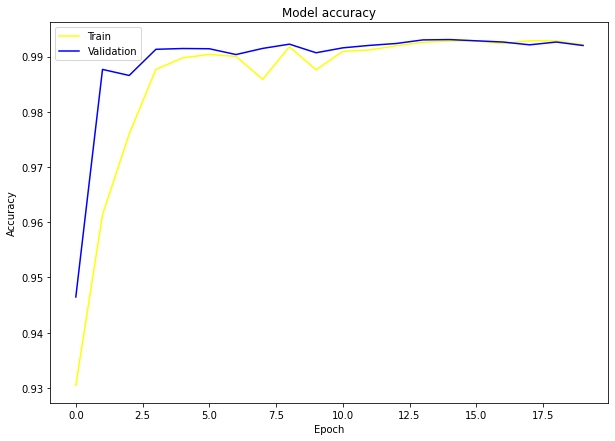

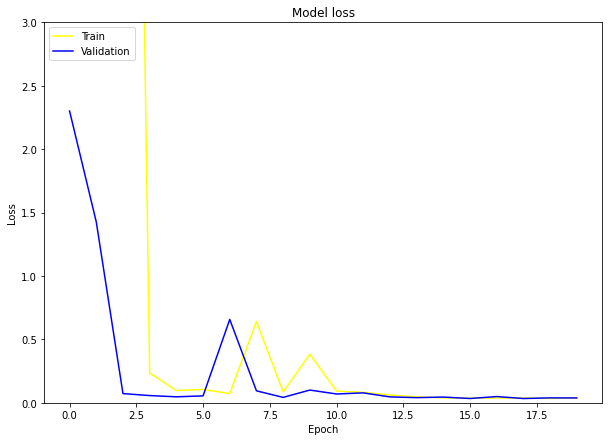

In [19]:
plt.figure(figsize = (10,7))
plt.plot(history.history['accuracy'], color = 'yellow')
plt.plot(history.history['val_accuracy'], color = 'blue')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(history.history['loss'], color = 'yellow')
plt.plot(history.history['val_loss'], color = 'blue')
plt.ylim((0,3))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

BREAST CANCER

In [20]:
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

In [21]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)
print(x.shape)
print(y.shape)

(569, 30)
(569, 1)


In [22]:
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x))

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True)
x_dev, x_test, y_dev, y_test = train_test_split(x, y, test_size = 0.5, shuffle = True)
print(x_train.shape)
print(x_dev.shape)
print(x_test.shape)
print(y_train.shape)
print(y_dev.shape)
print(y_test.shape)

(455, 30)
(284, 30)
(285, 30)
(455, 1)
(284, 1)
(285, 1)


In [24]:
nn= models.Sequential()
nn.add(layers.Dense(256, activation = 'relu', input_shape = (30, )))
nn.add(layers.Dense(128, activation = 'relu'))
nn.add(layers.Dense(64, activation = 'relu'))
nn.add(layers.Dense(1, activation = 'sigmoid'))
nn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [25]:
history = nn.fit(x_train, y_train, epochs = 20, validation_data = (x_dev, y_dev))

Epoch 1/20
15/15 [==============================] - 0s 13ms/step - loss: 0.3777 - accuracy: 0.8703 - val_loss: 0.1525 - val_accuracy: 0.9472
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 0.1083 - accuracy: 0.9626 - val_loss: 0.0883 - val_accuracy: 0.9718
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0676 - accuracy: 0.9802 - val_loss: 0.0739 - val_accuracy: 0.9859
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0544 - accuracy: 0.9824 - val_loss: 0.0644 - val_accuracy: 0.9789
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 0.0459 - accuracy: 0.9912 - val_loss: 0.0626 - val_accuracy: 0.9859
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0364 - accuracy: 0.9912 - val_loss: 0.0474 - val_accuracy: 0.9824
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0307 - accuracy: 0.9934 - val_loss: 0.0396 - val_accuracy: 0.9859
Epoch 8/20
15/15 [=

In [26]:
dev_acc = nn.evaluate(x_dev, y_dev)[1]
print('The dev accuracy is', dev_acc)

9/9 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 0.9965
The dev accuracy is 0.9964788556098938


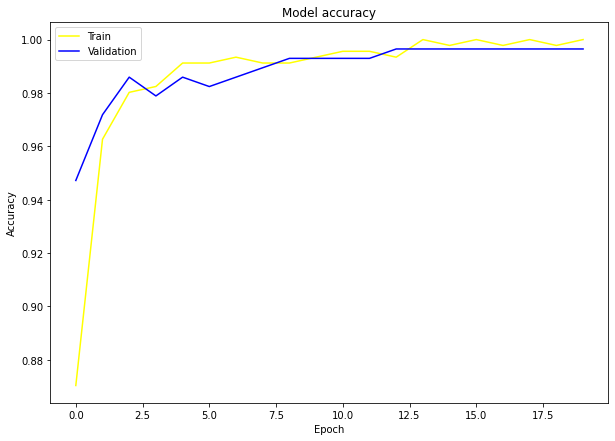

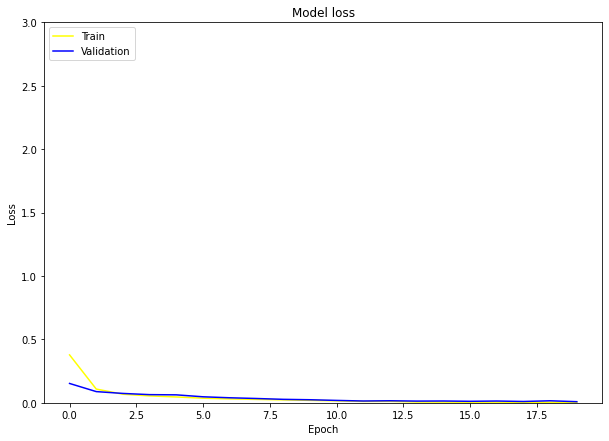

In [27]:
plt.figure(figsize = (10,7))
plt.plot(history.history['accuracy'], color = 'yellow')
plt.plot(history.history['val_accuracy'], color = 'blue')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(history.history['loss'], color = 'yellow')
plt.plot(history.history['val_loss'], color = 'blue')
plt.ylim((0,3))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

WINE

In [28]:
wine = load_wine()
x = wine.data
y = wine.target

In [29]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)
print(x.shape)
print(y.shape)

(178, 13)
(178, 1)


In [30]:
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x))

In [31]:
y1 = to_categorical(y)
x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size = 0.2, shuffle = True)
x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size = 0.5, shuffle = True)
print(x_train.shape)
print(x_dev.shape)
print(x_test.shape)
print(y_train.shape)
print(y_dev.shape)
print(y_test.shape)

(142, 13)
(18, 13)
(18, 13)
(142, 3)
(18, 3)
(18, 3)


In [32]:
nn = models.Sequential()
nn.add(layers.Dense(64, activation = 'relu', input_shape = (13, )))
nn.add(layers.Dense(32, activation = 'relu'))
nn.add(layers.Dense(3, activation = 'sigmoid'))
nn.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [33]:
history = nn.fit(x_train, y_train, epochs = 100, validation_data = (x_dev, y_dev))

Epoch 1/100
5/5 [==============================] - 0s 52ms/step - loss: 1.1534 - accuracy: 0.3239 - val_loss: 1.1631 - val_accuracy: 0.2778
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 1.1339 - accuracy: 0.3310 - val_loss: 1.1453 - val_accuracy: 0.2778
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 1.1159 - accuracy: 0.3310 - val_loss: 1.1281 - val_accuracy: 0.2778
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 1.0983 - accuracy: 0.3451 - val_loss: 1.1116 - val_accuracy: 0.2778
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 1.0816 - accuracy: 0.3521 - val_loss: 1.0956 - val_accuracy: 0.3333
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 1.0651 - accuracy: 0.3873 - val_loss: 1.0796 - val_accuracy: 0.2778
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 1.0493 - accuracy: 0.4014 - val_loss: 1.0651 - val_accuracy: 0.3333
Epoch 8/100
5/5 [=========

In [34]:
dev_acc = nn.evaluate(x_dev, y_dev)[1]
print('The dev accuracy is', dev_acc)

1/1 [==============================] - 0s 1ms/step - loss: 0.1789 - accuracy: 0.9444
The dev accuracy is 0.9444444179534912


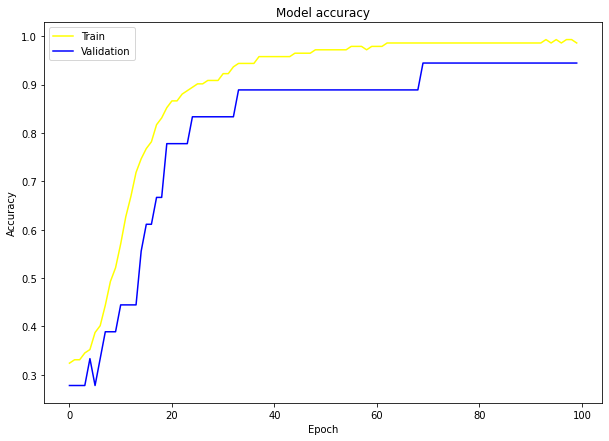

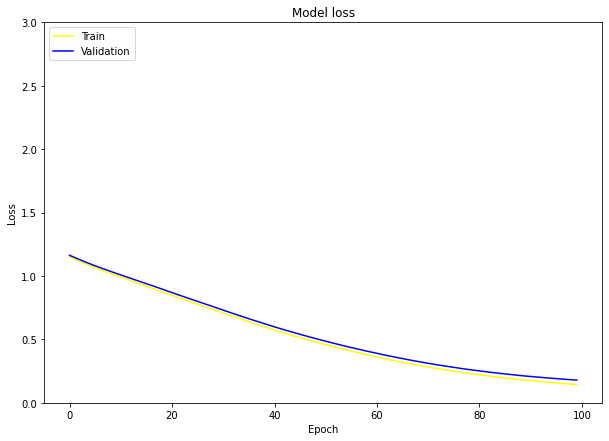

In [35]:
plt.figure(figsize = (10,7))
plt.plot(history.history['accuracy'], color = 'yellow')
plt.plot(history.history['val_accuracy'], color = 'blue')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(history.history['loss'], color = 'yellow')
plt.plot(history.history['val_loss'], color = 'blue')
plt.ylim((0,3))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()